<a href="https://colab.research.google.com/github/Jgallear/CSSP_brazil_23_24/blob/main/plot_crop_grids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# need rioxarray to mask crop data for Brazil
!pip install rioxarray
!pip install cartopy
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.2 MB/s eta 0:00:00


In [ ]:
import rioxarray as riox
from rasterio.enums import Resampling
import xarray as xr
from rasterio import CRS
from sklearn.neighbors import KNeighborsRegressor
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping
from shapely.geometry import Point
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
import glob
from scipy import stats
import pickle

In [ ]:
# load and mask GRACE data
def mask_data(data_path, br_shape,xdim='lon',ydim='lat'):
  # function to mask netcdf using shapefile: Need rioxarray installed
  data_xr = xr.open_dataset(data_path)
  data_xr.rio.set_spatial_dims(x_dim=xdim,y_dim=ydim,inplace=True)
  data_xr.rio.write_crs('epsg:4326',inplace=True)
  data_xr_br = data_xr.rio.clip(br_shape.geometry.apply(mapping),br_shape.crs, drop=False)
  return data_xr_br

Brazil_shape = gpd.read_file('/content/drive/MyDrive/shapefiles/BR/BR_EST_SAD69.shp', crs="epsg:4326")

In [ ]:
# load Brazil shapefile
fname = '/content/drive/MyDrive/shapefiles/BR/BR_EST_SAD69.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none')

In [ ]:
# use brazil shape and mask data function to get cropland data filtered for Brazil

In [ ]:
maize_ar = mask_data('/content/drive/MyDrive/area_data/crop_grids/CROPGRIDSv1.07_NC_maps/CROPGRIDSv1.07_maize.nc',Brazil_shape)

In [ ]:
soy_ar = mask_data('/content/drive/MyDrive/area_data/crop_grids/CROPGRIDSv1.07_NC_maps/CROPGRIDSv1.07_soybean.nc',Brazil_shape)

In [ ]:
print(maize_ar)

<xarray.Dataset>
Dimensions:      (lon: 7200, lat: 3600)
Coordinates:
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * lat          (lat) float32 -89.97 -89.93 -89.88 -89.82 ... 89.88 89.93 89.97
    spatial_ref  int64 0
Data variables:
    harvarea     (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    croparea     (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    qual         (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    set          (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Creation date:  14-Nov-2023 16:34:06
    Authors:        F. Maggi, F.H.M. Tang, T.H. Nguyen
    Version:        v1.07


In [ ]:
print(np.nanmax(soy_ar['harvarea'].to_numpy()))
print(np.nanmax(maize_ar['harvarea'].to_numpy()))

2921.0176
1399.6061


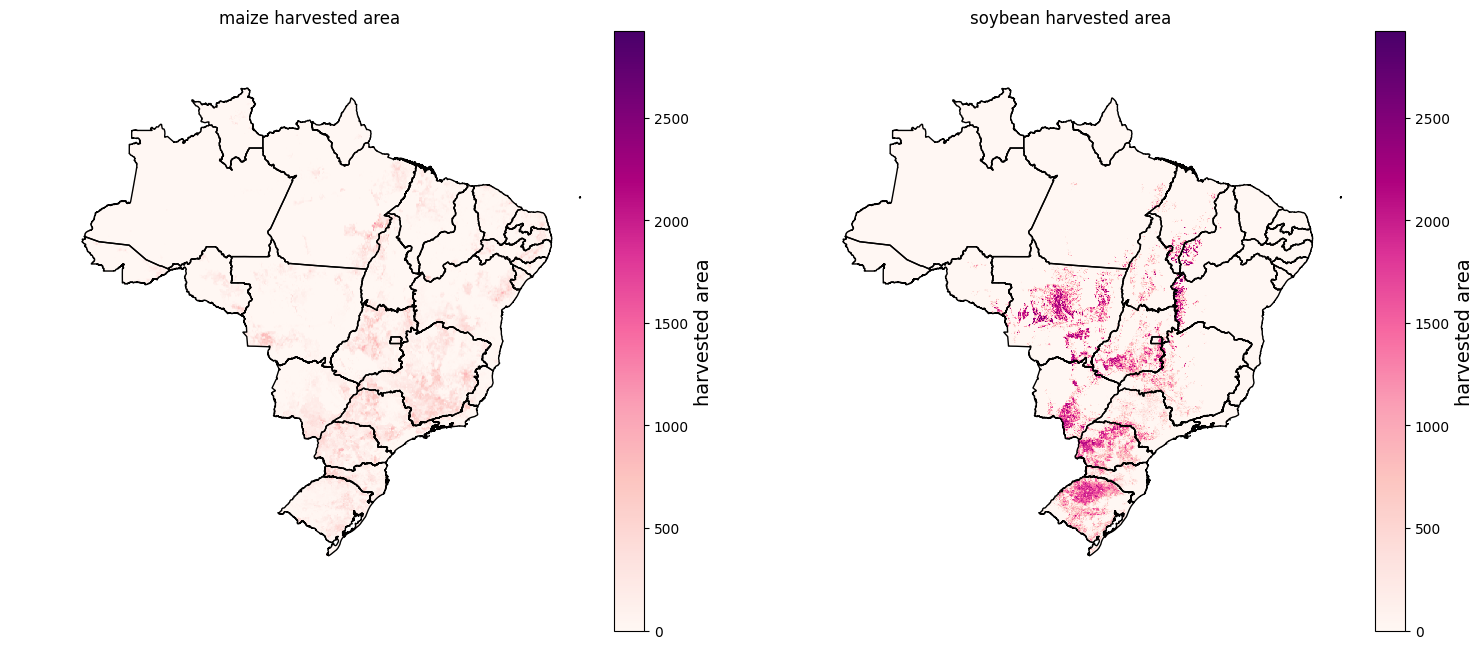

In [ ]:
fig = plt.figure(figsize=(18,20))
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_ar['lon'].to_numpy(), maize_ar['lat'].to_numpy(), maize_ar['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=np.nanmax(soy_ar['harvarea'].to_numpy()))
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('maize harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')

ax1 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(soy_ar['lon'].to_numpy(), soy_ar['lat'].to_numpy(), soy_ar['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=np.nanmax(soy_ar['harvarea'].to_numpy()))
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('soybean harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')



plt.show()

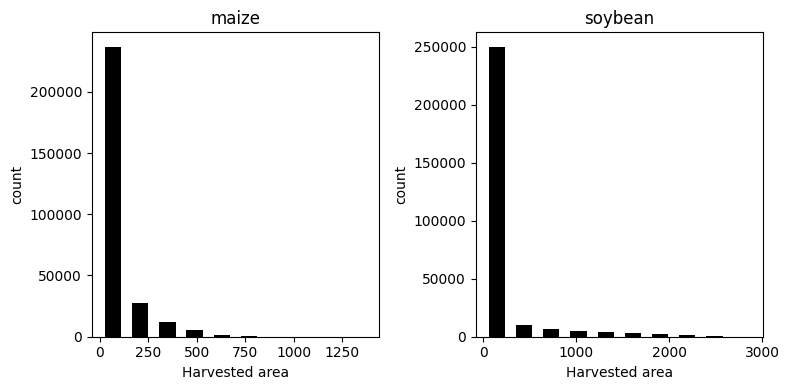

In [ ]:
# Create histograms of harvested area for maize and soybean
# Should 0s be included in histograms??
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(maize_ar['harvarea'].to_numpy().ravel()[~np.isnan(maize_ar['harvarea'].to_numpy().ravel())],rwidth=0.6,color='k')
ax1.set_ylabel('count')
ax1.set_xlabel('Harvested area')
ax1.set_title('maize')
ax1 = fig.add_subplot(1,2,2)
ax1.hist(soy_ar['harvarea'].to_numpy().ravel()[~np.isnan(soy_ar['harvarea'].to_numpy().ravel())],rwidth=0.6,color='k')
ax1.set_ylabel('count')
ax1.set_xlabel('Harvested area')
ax1.set_title('soybean')
plt.tight_layout()
plt.show()

In [ ]:
print(np.min(soy_ar['harvarea'].to_numpy().ravel()[~np.isnan(soy_ar['harvarea'].to_numpy().ravel())]))
print(np.max(soy_ar['harvarea'].to_numpy().ravel()[~np.isnan(soy_ar['harvarea'].to_numpy().ravel())]))
print(stats.mode(soy_ar['harvarea'].to_numpy().ravel()[~np.isnan(soy_ar['harvarea'].to_numpy().ravel())]))

-1.0
2921.0176
ModeResult(mode=0.0, count=218307)


In [ ]:
print(np.min(maize_ar['harvarea'].to_numpy().ravel()[~np.isnan(maize_ar['harvarea'].to_numpy().ravel())]))
print(np.max(maize_ar['harvarea'].to_numpy().ravel()[~np.isnan(maize_ar['harvarea'].to_numpy().ravel())]))
print(stats.mode(maize_ar['harvarea'].to_numpy().ravel()[~np.isnan(maize_ar['harvarea'].to_numpy().ravel())]))

-1.0
1399.6061
ModeResult(mode=0.0, count=129470)


In [ ]:
soy_hist_plot = soy_ar['harvarea'].to_numpy().ravel()[~np.isnan(soy_ar['harvarea'].to_numpy().ravel())]
mai_hist_plot = maize_ar['harvarea'].to_numpy().ravel()[~np.isnan(maize_ar['harvarea'].to_numpy().ravel())]

In [ ]:
# clip arrays to remove -1 (any value below 0)
soy_hist_plot_clipped = np.clip(soy_hist_plot,0,2922)
mai_hist_plot_clipped = np.clip(mai_hist_plot,0,2922)

In [ ]:
# remove 0 value from soybean and maize histogram plot
soy_hist_plot_no0 =  np.delete(soy_hist_plot_clipped, np.where(soy_hist_plot_clipped == 0))
mai_hist_plot_no0 = np.delete(mai_hist_plot_clipped, np.where(mai_hist_plot_clipped == 0))

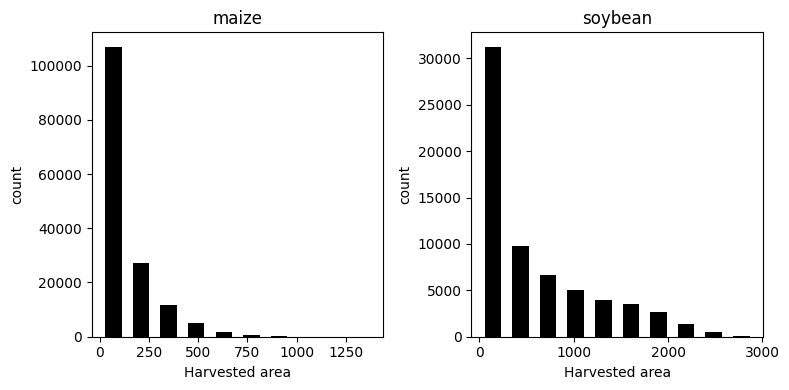

In [ ]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(mai_hist_plot_no0,rwidth=0.6,color='k')
ax1.set_ylabel('count')
ax1.set_xlabel('Harvested area')
ax1.set_title('maize')
ax1 = fig.add_subplot(1,2,2)
ax1.hist(soy_hist_plot_no0,rwidth=0.6,color='k')
ax1.set_ylabel('count')
ax1.set_xlabel('Harvested area')
ax1.set_title('soybean')
plt.tight_layout()
plt.show()
# below histogram shows 0 values removed so only shows where crop is farmed

Soybean is more intensively farmed than maize

In [ ]:
print(np.min(mai_hist_plot_no0))
print(np.min(soy_hist_plot_no0))

0.01
0.039290726


In [ ]:
print(stats.mode(maize_ar['harvarea'].to_numpy().ravel()))

ModeResult(mode=nan, count=25636235)


In [ ]:
# create upscaled versions of harvested area to act as filters for model
print(maize_ar['lon'].to_numpy())
print(0.25/0.05)
# Need to divide lat and lon by 5 to get upscaled data to 0.25

[-179.975 -179.925 -179.875 ...  179.875  179.925  179.975]
5.0


In [ ]:
downscale_factor = 1/5

In [ ]:
def downsample_netcdf(nc,downscale_factor):
  new_width = nc.rio.width * downscale_factor
  new_height = nc.rio.height * downscale_factor
  down_sampled = nc.rio.reproject(nc.rio.crs, shape=(int(new_height), int(new_width)), resampling=Resampling.sum)
  print(nc.rio.resolution(), down_sampled.rio.resolution())
  print(nc['harvarea'].to_numpy().shape, down_sampled['harvarea'].to_numpy().shape)
  return down_sampled

In [ ]:
maize_downsampled = downsample_netcdf(maize_ar,downscale_factor)

(0.050000001695656514, 0.049999999152053956) (0.2500000059346801, -0.24999999788013488)
(3600, 7200) (720, 1440)


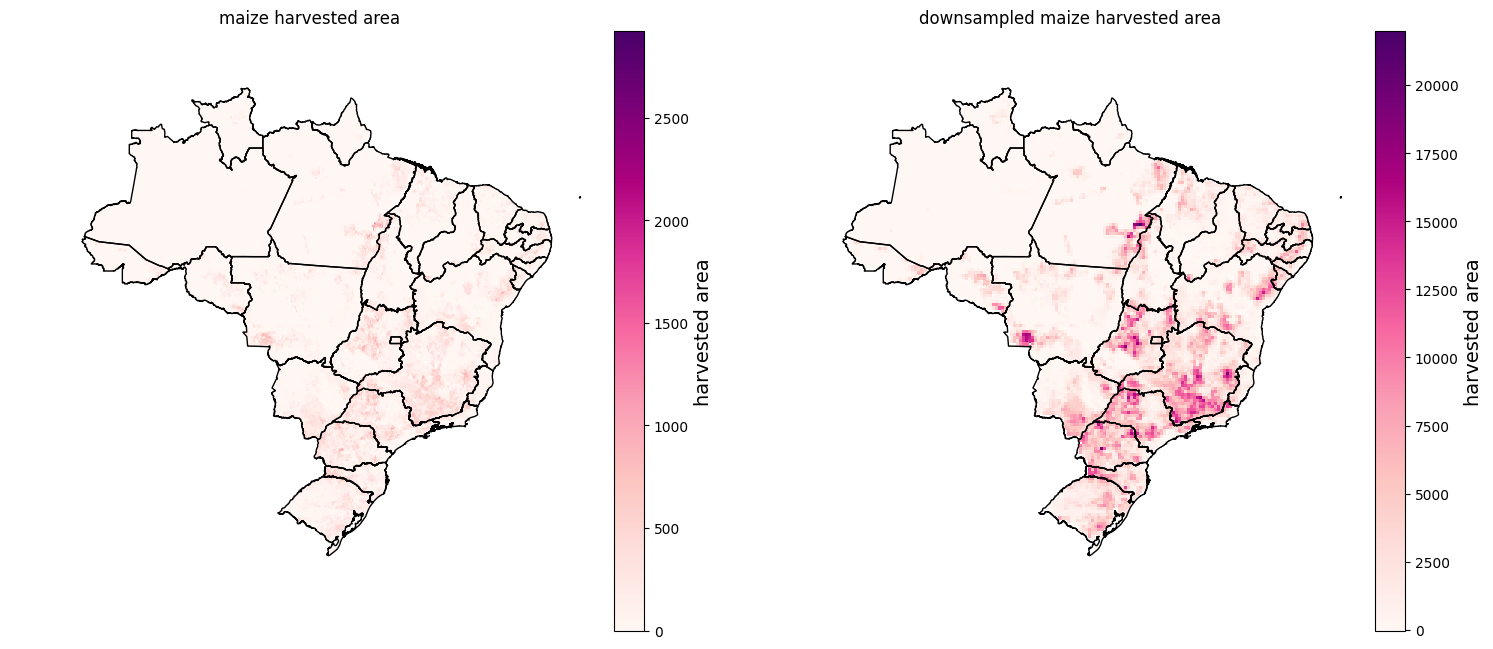

In [ ]:
fig = plt.figure(figsize=(18,20))
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_ar['lon'].to_numpy(), maize_ar['lat'].to_numpy(), maize_ar['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=np.nanmax(soy_ar['harvarea'].to_numpy()))
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('maize harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')

ax1 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_downsampled['x'].to_numpy(), maize_downsampled['y'].to_numpy(), maize_downsampled['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu')
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('downsampled maize harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')

plt.show()

In [ ]:
print(maize_downsampled['x'].to_numpy())

[-179.8750061  -179.6250061  -179.37500609 ...  179.37500243  179.62500243
  179.87500244]


In [ ]:
print(maize_downsampled['y'].to_numpy())

[ 89.87499847  89.62499848  89.37499848  89.12499848  88.87499848
  88.62499849  88.37499849  88.12499849  87.87499849  87.62499849
  87.3749985   87.1249985   86.8749985   86.6249985   86.3749985
  86.12499851  85.87499851  85.62499851  85.37499851  85.12499852
  84.87499852  84.62499852  84.37499852  84.12499852  83.87499853
  83.62499853  83.37499853  83.12499853  82.87499853  82.62499854
  82.37499854  82.12499854  81.87499854  81.62499854  81.37499855
  81.12499855  80.87499855  80.62499855  80.37499856  80.12499856
  79.87499856  79.62499856  79.37499856  79.12499857  78.87499857
  78.62499857  78.37499857  78.12499857  77.87499858  77.62499858
  77.37499858  77.12499858  76.87499858  76.62499859  76.37499859
  76.12499859  75.87499859  75.6249986   75.3749986   75.1249986
  74.8749986   74.6249986   74.37499861  74.12499861  73.87499861
  73.62499861  73.37499861  73.12499862  72.87499862  72.62499862
  72.37499862  72.12499863  71.87499863  71.62499863  71.37499863
  71.1249986

In [ ]:
#### Need to round lat and lon 3 decimal places to get matching coordinates with other data
maize_downsampled['y'] = np.around(maize_downsampled['y'],decimals=3)
maize_downsampled['x'] = np.around(maize_downsampled['x'],decimals=3)

In [ ]:
print(maize_downsampled['y'].to_numpy())

[ 89.875  89.625  89.375  89.125  88.875  88.625  88.375  88.125  87.875
  87.625  87.375  87.125  86.875  86.625  86.375  86.125  85.875  85.625
  85.375  85.125  84.875  84.625  84.375  84.125  83.875  83.625  83.375
  83.125  82.875  82.625  82.375  82.125  81.875  81.625  81.375  81.125
  80.875  80.625  80.375  80.125  79.875  79.625  79.375  79.125  78.875
  78.625  78.375  78.125  77.875  77.625  77.375  77.125  76.875  76.625
  76.375  76.125  75.875  75.625  75.375  75.125  74.875  74.625  74.375
  74.125  73.875  73.625  73.375  73.125  72.875  72.625  72.375  72.125
  71.875  71.625  71.375  71.125  70.875  70.625  70.375  70.125  69.875
  69.625  69.375  69.125  68.875  68.625  68.375  68.125  67.875  67.625
  67.375  67.125  66.875  66.625  66.375  66.125  65.875  65.625  65.375
  65.125  64.875  64.625  64.375  64.125  63.875  63.625  63.375  63.125
  62.875  62.625  62.375  62.125  61.875  61.625  61.375  61.125  60.875
  60.625  60.375  60.125  59.875  59.625  59.375  5

In [ ]:
print(maize_downsampled['x'].to_numpy())

[-179.875 -179.625 -179.375 ...  179.375  179.625  179.875]


In [ ]:
print(maize_downsampled)

<xarray.Dataset>
Dimensions:      (x: 1440, y: 720)
Coordinates:
  * x            (x) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * y            (y) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
    spatial_ref  int64 0
Data variables:
    harvarea     (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    croparea     (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    qual         (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    set          (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Creation date:  14-Nov-2023 16:34:06
    Authors:        F. Maggi, F.H.M. Tang, T.H. Nguyen
    Version:        v1.07


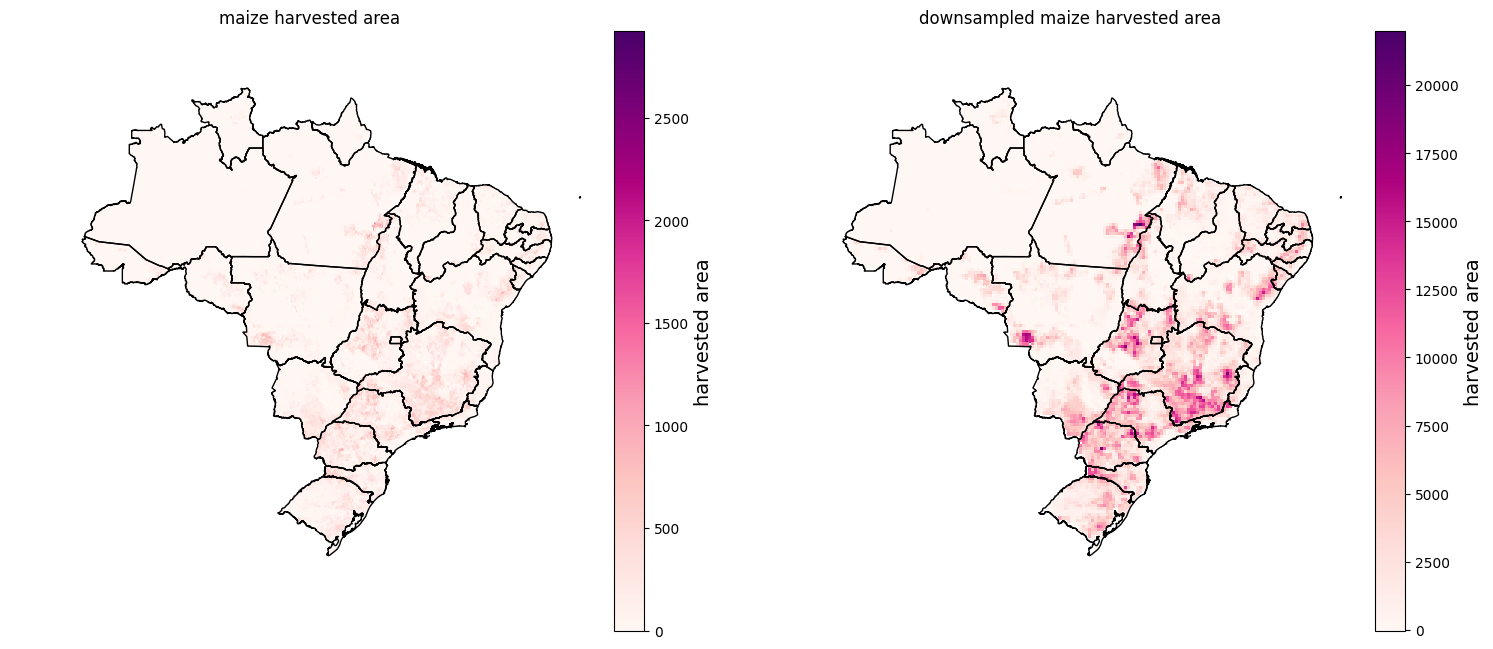

In [ ]:
fig = plt.figure(figsize=(18,20))
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_ar['lon'].to_numpy(), maize_ar['lat'].to_numpy(), maize_ar['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=np.nanmax(soy_ar['harvarea'].to_numpy()))
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('maize harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')

ax1 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_downsampled['x'].to_numpy(), maize_downsampled['y'].to_numpy(), maize_downsampled['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu')
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('downsampled maize harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')

plt.show()

In [ ]:
#maize_downsampled = maize_downsampled.rename_dims(dims_dict={'x':'lon','y':'lat'})
print(maize_downsampled)

<xarray.Dataset>
Dimensions:      (x: 1440, y: 720)
Coordinates:
  * x            (x) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * y            (y) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
    spatial_ref  int64 0
Data variables:
    harvarea     (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    croparea     (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    qual         (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    set          (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Creation date:  14-Nov-2023 16:34:06
    Authors:        F. Maggi, F.H.M. Tang, T.H. Nguyen
    Version:        v1.07


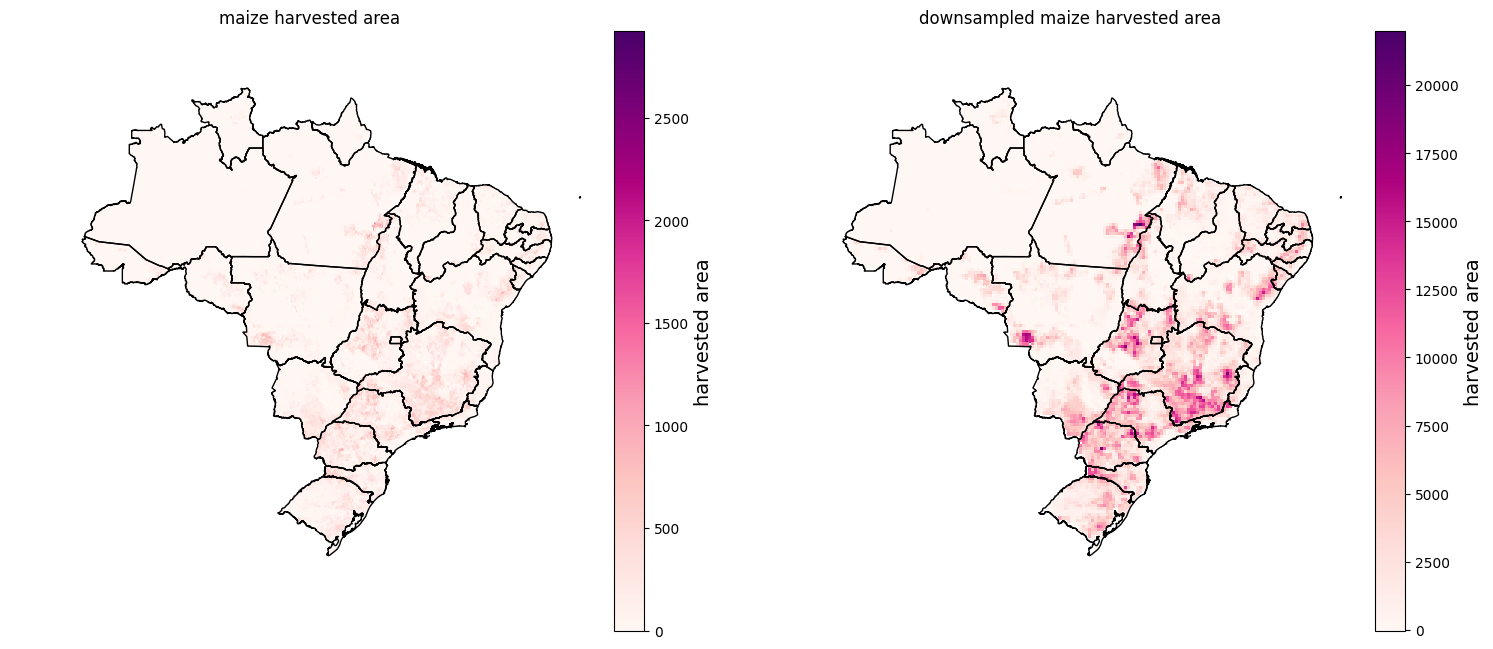

In [ ]:
fig = plt.figure(figsize=(18,20))
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_ar['lon'].to_numpy(), maize_ar['lat'].to_numpy(), maize_ar['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=np.nanmax(soy_ar['harvarea'].to_numpy()))
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('maize harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')

ax1 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_downsampled['x'].to_numpy(), maize_downsampled['y'].to_numpy(), maize_downsampled['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu')
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('downsampled maize harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')

plt.show()

In [ ]:
# Need to do the same for the soybean xarray dataset
soy_downsampled = downsample_netcdf(soy_ar,downscale_factor)

(0.050000001695656514, 0.049999999152053956) (0.2500000059346801, -0.24999999788013488)
(3600, 7200) (720, 1440)


In [ ]:
soy_downsampled['y'] = np.around(soy_downsampled['y'],decimals=3)
soy_downsampled['x'] = np.around(soy_downsampled['x'],decimals=3)

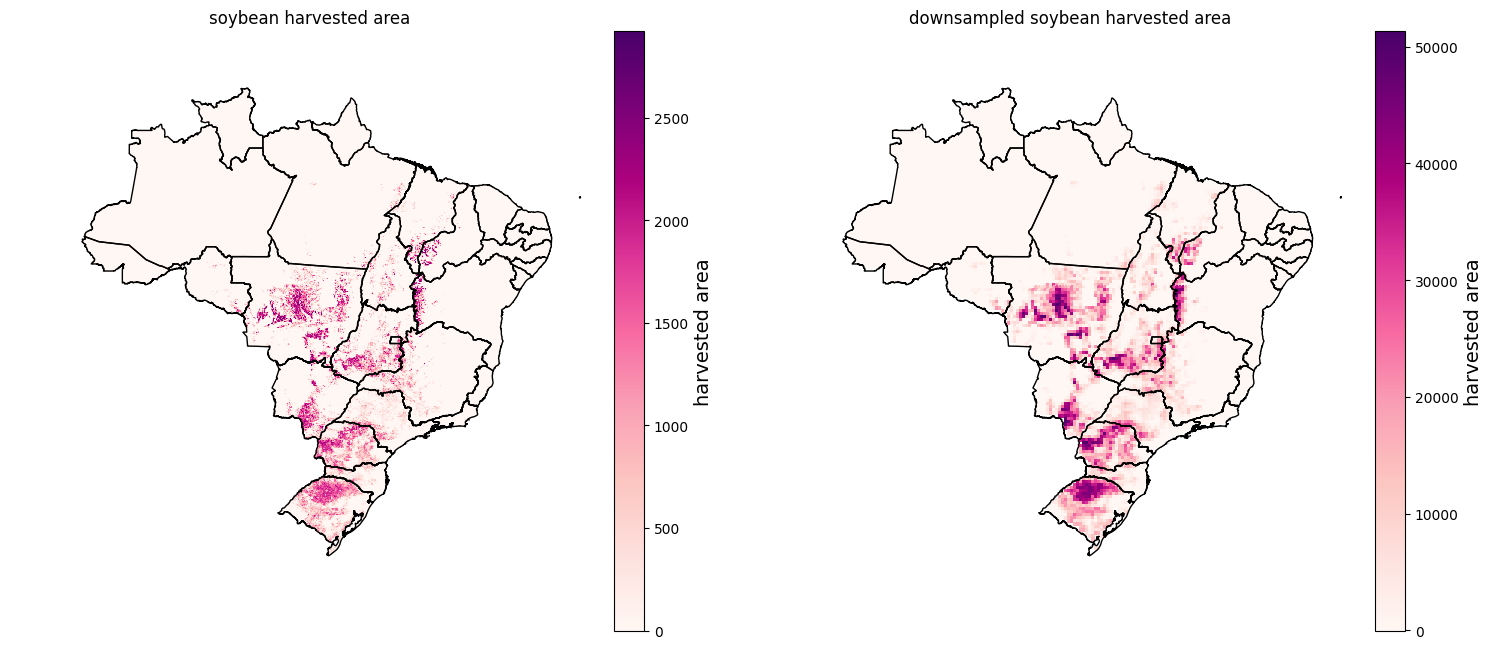

In [ ]:
# plot soy and soy downsampled
fig = plt.figure(figsize=(18,20))
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(soy_ar['lon'].to_numpy(), soy_ar['lat'].to_numpy(), soy_ar['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=np.nanmax(soy_ar['harvarea'].to_numpy()))
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('soybean harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')

ax1 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(soy_downsampled['x'].to_numpy(), soy_downsampled['y'].to_numpy(), soy_downsampled['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu')
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('downsampled soybean harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')

plt.show()

In [ ]:
#soy_downsampled = soy_downsampled.rename_dims(dims_dict={'x':'lon','y':'lat'})

In [ ]:
print(np.nanmax(maize_downsampled['harvarea'].to_numpy()))

21964.96


In [ ]:
print(maize_downsampled['harvarea'].to_numpy())

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [ ]:
# make downsampled data into csv and save
mai_downsampled_df = maize_downsampled.to_dataframe()
soy_downsampled_df = soy_downsampled.to_dataframe()

In [ ]:
import cartopy.feature as cf

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


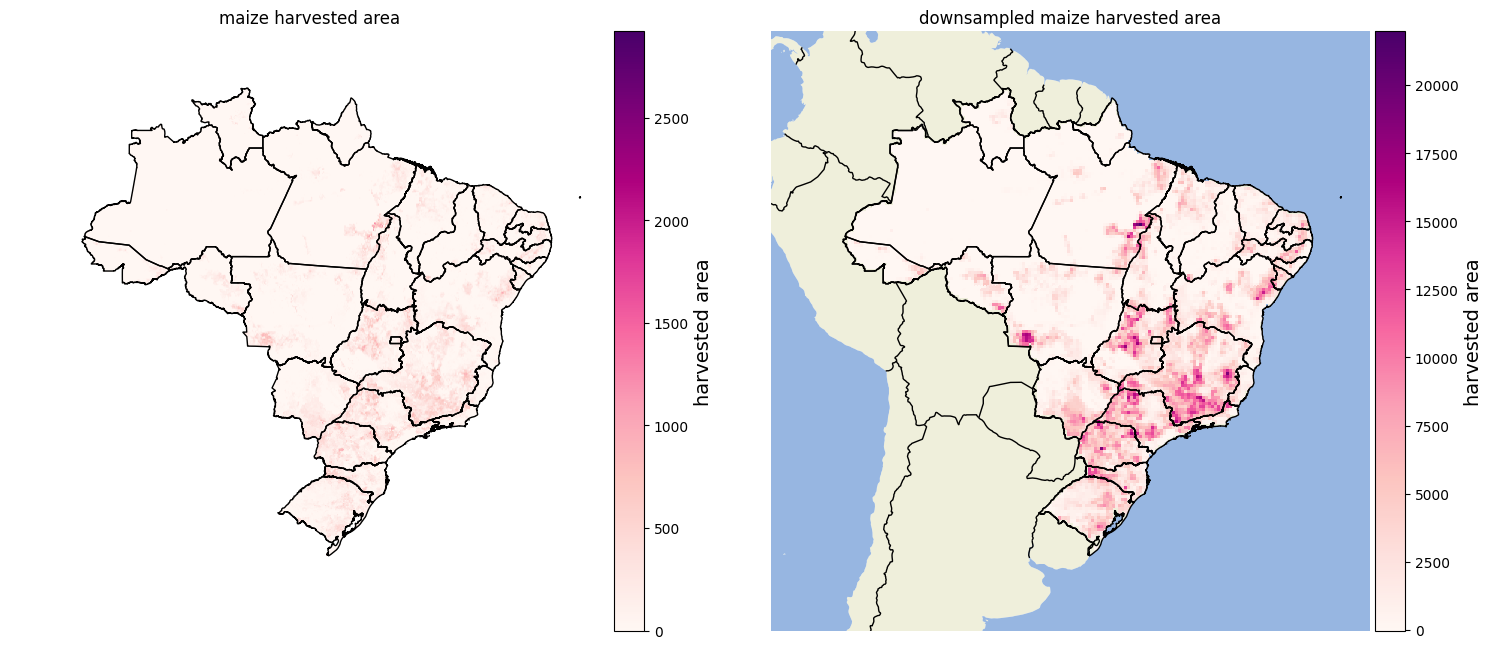

In [ ]:
# plot new lat and lon of downsampled data then save
# maize comparison
fig = plt.figure(figsize=(18,20))
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_ar['lon'].to_numpy(), maize_ar['lat'].to_numpy(), maize_ar['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=np.nanmax(soy_ar['harvarea'].to_numpy()))
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('maize harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(shape_feature)
ax1.axis('off')

ax1 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_downsampled['x'].to_numpy(), maize_downsampled['y'].to_numpy(), maize_downsampled['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu')
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area',fontsize='14')
ax1.title.set_text('downsampled maize harvested area')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
ax1.add_feature(cf.BORDERS)
ax1.add_feature(cf.LAND)
ax1.add_feature(cf.OCEAN)
ax1.add_feature(shape_feature)
ax1.axis('off')

plt.show()

In [ ]:
brazil_x = np.linspace(-80,-30,50)
brazil_y = np.linspace(-40,10,50)
print(brazil_x)
brazil_y

[-80.         -78.97959184 -77.95918367 -76.93877551 -75.91836735
 -74.89795918 -73.87755102 -72.85714286 -71.83673469 -70.81632653
 -69.79591837 -68.7755102  -67.75510204 -66.73469388 -65.71428571
 -64.69387755 -63.67346939 -62.65306122 -61.63265306 -60.6122449
 -59.59183673 -58.57142857 -57.55102041 -56.53061224 -55.51020408
 -54.48979592 -53.46938776 -52.44897959 -51.42857143 -50.40816327
 -49.3877551  -48.36734694 -47.34693878 -46.32653061 -45.30612245
 -44.28571429 -43.26530612 -42.24489796 -41.2244898  -40.20408163
 -39.18367347 -38.16326531 -37.14285714 -36.12244898 -35.10204082
 -34.08163265 -33.06122449 -32.04081633 -31.02040816 -30.        ]


array([-40.        , -38.97959184, -37.95918367, -36.93877551,
       -35.91836735, -34.89795918, -33.87755102, -32.85714286,
       -31.83673469, -30.81632653, -29.79591837, -28.7755102 ,
       -27.75510204, -26.73469388, -25.71428571, -24.69387755,
       -23.67346939, -22.65306122, -21.63265306, -20.6122449 ,
       -19.59183673, -18.57142857, -17.55102041, -16.53061224,
       -15.51020408, -14.48979592, -13.46938776, -12.44897959,
       -11.42857143, -10.40816327,  -9.3877551 ,  -8.36734694,
        -7.34693878,  -6.32653061,  -5.30612245,  -4.28571429,
        -3.26530612,  -2.24489796,  -1.2244898 ,  -0.20408163,
         0.81632653,   1.83673469,   2.85714286,   3.87755102,
         4.89795918,   5.91836735,   6.93877551,   7.95918367,
         8.97959184,  10.        ])

In [ ]:
xt = np.linspace(np.min(brazil_x),np.max(brazil_x),5)
xt = np.round(xt,decimals=0)

yt = np.linspace(np.min(brazil_y),np.max(brazil_y),5)
yt = np.round(yt,decimals=0)

<ipython-input-71-a5c0228932a0>:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


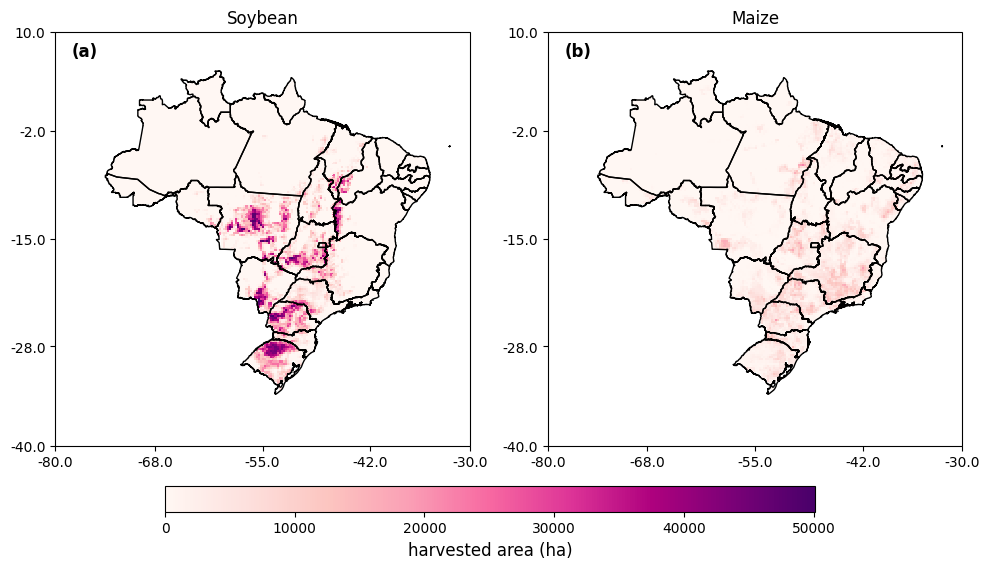

In [ ]:
# create side by side comparison of downsampled maize and soybean and save
# plot new lat and lon of downsampled data then save
# maize comparison
fig = plt.figure(figsize=(10,13))
ax1 = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(soy_downsampled['x'].to_numpy(), soy_downsampled['y'].to_numpy(), soy_downsampled['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=50100)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
#cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('harvested area (ha)',fontsize='14')
ax1.set_title('Soybean')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.add_feature(shape_feature)
#ax1.axis('off')
ax1.set_xticks(xt)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_yticks(yt)
ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)+2,np.max(yt)-3,s='(a)',weight='bold',fontsize=12)


ax1 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_downsampled['x'].to_numpy(), maize_downsampled['y'].to_numpy(), maize_downsampled['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=50100)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
#divider = make_axes_locatable(ax1)
#cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
#cbar = fig.colorbar(im, ax=ax1,cax=cax)
#cbar.ax.set_ylabel('harvested area (ha)',fontsize='14')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
#ax1.add_feature(cf.LAND)
#ax1.add_feature(cf.OCEAN)
ax1.add_feature(shape_feature)
#ax1.axis('off')
ax1.set_title('Maize')
ax1.set_xticks(xt)
ax1.set_xticklabels(ax1.get_xticks())
ax1.set_yticks(yt)
ax1.set_yticklabels(ax1.get_yticks())
ax1.text(np.min(xt)+2,np.max(yt)-3,s='(b)',weight='bold',fontsize=12)

#fig.subplots_adjust(bottom=0.8)
cbar_ax = fig.add_axes([0.17, 0.29, 0.65, 0.02])
cbar=fig.colorbar(im, cax=cbar_ax,orientation='horizontal')
cbar.ax.set_xlabel('harvested area (ha)',fontsize='12')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Figures/soybean_maize_harvested_area.png',dpi=500,bbox_inches='tight')
plt.show()

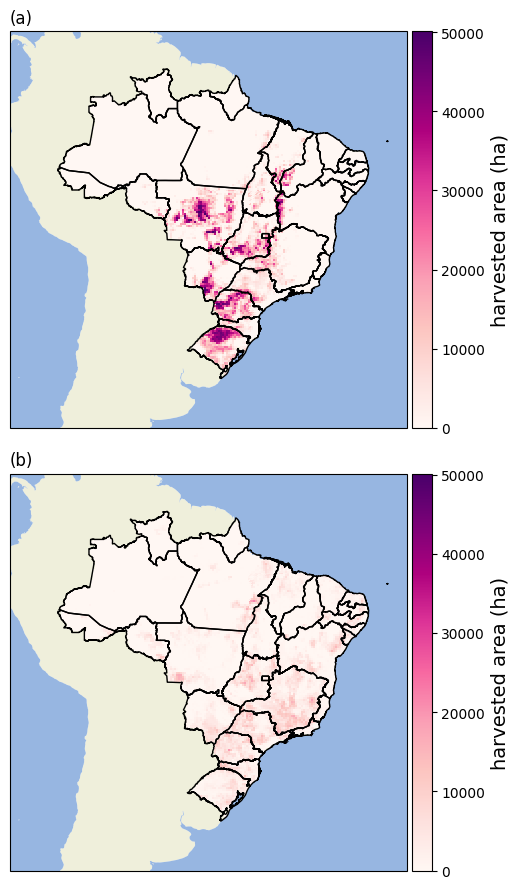

In [ ]:
fig = plt.figure(figsize=(6,9))
ax1 = fig.add_subplot(2,1,1,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(soy_downsampled['x'].to_numpy(), soy_downsampled['y'].to_numpy(), soy_downsampled['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=50100)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area (ha)',fontsize='14')
ax1.set_title('(a)',loc='left')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(cf.LAND)
ax1.add_feature(cf.OCEAN)
ax1.add_feature(shape_feature)
#ax1.axis('off')

ax1 = fig.add_subplot(2,1,2,projection=ccrs.PlateCarree())
#ax1.coastlines()
im=ax1.pcolor(maize_downsampled['x'].to_numpy(), maize_downsampled['y'].to_numpy(), maize_downsampled['harvarea'].to_numpy(), transform=ccrs.PlateCarree(), cmap='RdPu',vmin=0,vmax=50100)
# # Set the location and size of the colorbar axes manually
#cax = fig.add_axes([]) # left, bottom, width, height
# # Add the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05,axes_class=plt.Axes)
cbar = fig.colorbar(im, ax=ax1,cax=cax)
cbar.ax.set_ylabel('harvested area (ha)',fontsize='14')
ax1.set_title('(b)',loc='left')
ax1.set_extent([-80, -30, -40, 10], crs=ccrs.PlateCarree())
#plt.savefig('plots/Iizumi_2020_maize_global.pdf')
#ax1.add_feature(cf.BORDERS)
ax1.add_feature(cf.LAND)
ax1.add_feature(cf.OCEAN)
ax1.add_feature(shape_feature)
#ax1.axis('off')
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Figures/soybean_maize_harvested_area.png',dpi=500,bbox_inches='tight')
plt.show()

In [ ]:
mai_downsampled_df = mai_downsampled_df.reset_index()
soy_downsampled_df = soy_downsampled_df.reset_index()
# drop nan values
mai_downsampled_df.dropna(inplace=True)
soy_downsampled_df.dropna(inplace=True)
print(mai_downsampled_df)

             x      y  spatial_ref    harvarea    croparea       qual   set
307107 -73.375 -6.875            0    0.000000    0.000000   0.000000  75.0
307108 -73.375 -7.125            0    0.000000    0.000000   0.000000  75.0
307109 -73.375 -7.375            0    6.988306    6.988306   8.964394  75.0
307110 -73.375 -7.625            0    0.987050    0.987050   3.735090  75.0
307111 -73.375 -7.875            0    0.000000    0.000000   0.000000  75.0
...        ...    ...          ...         ...         ...        ...   ...
417269 -35.125 -7.375            0  492.668182  492.668182  17.928762  75.0
417270 -35.125 -7.625            0  167.812912  167.812912  18.675760  75.0
417271 -35.125 -7.875            0  159.187485  159.187485  18.675760  75.0
417272 -35.125 -8.125            0   48.541782   48.541782  14.940637  75.0
417273 -35.125 -8.375            0   16.420631   16.420631  11.952596  75.0

[10922 rows x 7 columns]


In [ ]:
# remove index column
mai_downsampled_df.drop(columns=['spatial_ref'],inplace=True)
soy_downsampled_df.drop(columns=['spatial_ref'],inplace=True)

In [ ]:
# save data as csv
mai_downsampled_df.to_csv('/content/drive/MyDrive/area_data/crop_grids/downsampled_maize_data.csv',index=False)
soy_downsampled_df.to_csv('/content/drive/MyDrive/area_data/crop_grids/downsampled_soybean_data.csv',index=False)

In [ ]:
# Get crop grids data for states separately
print(Brazil_shape)

    UF                                           geometry
0   AC  POLYGON ((-73.73762 -7.13432, -72.90061 -7.436...
1   AL  POLYGON ((-35.46658 -8.81487, -35.46721 -8.817...
2   AM  POLYGON ((-67.32554 2.03005, -67.31627 2.00159...
3   AP  POLYGON ((-51.13238 3.91657, -51.12262 3.91075...
4   BA  POLYGON ((-39.36409 -8.53744, -39.35646 -8.544...
5   CE  POLYGON ((-40.49681 -2.78414, -40.48393 -2.791...
6   DF  POLYGON ((-48.28232 -15.82910, -48.28054 -15.8...
7   ES  MULTIPOLYGON (((-40.50275 -20.66778, -40.50461...
8   GO  POLYGON ((-50.15969 -12.41965, -50.15791 -12.4...
9   MA  MULTIPOLYGON (((-43.99898 -2.39552, -43.99673 ...
10  MG  POLYGON ((-44.20938 -14.24220, -44.20871 -14.2...
11  MS  POLYGON ((-56.10320 -17.17310, -56.10158 -17.1...
12  MT  POLYGON ((-57.93389 -7.65638, -57.92994 -7.656...
13  PA  MULTIPOLYGON (((-46.06054 -1.09435, -46.06625 ...
14  PB  MULTIPOLYGON (((-34.86245 -6.98252, -34.85795 ...
15  PE  MULTIPOLYGON (((-37.23327 -7.27399, -37.22759 ...
16  PI  POLYGO

In [ ]:
# get per state harvest area:
# Need to convert harvested area df into geodataframe


In [ ]:
# Use UF to filter based on state, then make a new list of harvest areas separated by state

In [ ]:
# Then can use state based harvested areas to filter forecasting model -- improve results with less data??
# MT is Mato Grosso soy_downsampled_df is soybean df
print(soy_downsampled_df)

             x      y  harvarea  croparea  qual    set
307107 -73.375 -6.875       0.0       0.0   0.0  250.0
307108 -73.375 -7.125       0.0       0.0   0.0  250.0
307109 -73.375 -7.375       0.0       0.0   0.0  250.0
307110 -73.375 -7.625       0.0       0.0   0.0  250.0
307111 -73.375 -7.875       0.0       0.0   0.0  250.0
...        ...    ...       ...       ...   ...    ...
417269 -35.125 -7.375       0.0       0.0   0.0  250.0
417270 -35.125 -7.625       0.0       0.0   0.0  250.0
417271 -35.125 -7.875       0.0       0.0   0.0  250.0
417272 -35.125 -8.125       0.0       0.0   0.0  250.0
417273 -35.125 -8.375       0.0       0.0   0.0  250.0

[10922 rows x 6 columns]


In [ ]:
def convert_df_to_geodf(df):
  geometry = [Point(ij) for ij in zip(df.x,df.y)]
  gdf = gpd.GeoDataFrame(df,crs='EPSG:4326',geometry=geometry)
  return gdf

In [ ]:
soy_downsampled_gdf = convert_df_to_geodf(soy_downsampled_df)
mai_downsampled_gdf = convert_df_to_geodf(mai_downsampled_df)
print(soy_downsampled_gdf)

             x      y  harvarea  croparea  qual    set  \
307107 -73.375 -6.875       0.0       0.0   0.0  250.0   
307108 -73.375 -7.125       0.0       0.0   0.0  250.0   
307109 -73.375 -7.375       0.0       0.0   0.0  250.0   
307110 -73.375 -7.625       0.0       0.0   0.0  250.0   
307111 -73.375 -7.875       0.0       0.0   0.0  250.0   
...        ...    ...       ...       ...   ...    ...   
417269 -35.125 -7.375       0.0       0.0   0.0  250.0   
417270 -35.125 -7.625       0.0       0.0   0.0  250.0   
417271 -35.125 -7.875       0.0       0.0   0.0  250.0   
417272 -35.125 -8.125       0.0       0.0   0.0  250.0   
417273 -35.125 -8.375       0.0       0.0   0.0  250.0   

                          geometry  
307107  POINT (-73.37500 -6.87500)  
307108  POINT (-73.37500 -7.12500)  
307109  POINT (-73.37500 -7.37500)  
307110  POINT (-73.37500 -7.62500)  
307111  POINT (-73.37500 -7.87500)  
...                            ...  
417269  POINT (-35.12500 -7.37500)  
417270 

In [ ]:
# Now filter points based on geometries of states
print(Brazil_shape)
soy_by_state = gpd.sjoin(soy_downsampled_gdf,Brazil_shape,op='within')

    UF                                           geometry
0   AC  POLYGON ((-73.73762 -7.13432, -72.90061 -7.436...
1   AL  POLYGON ((-35.46658 -8.81487, -35.46721 -8.817...
2   AM  POLYGON ((-67.32554 2.03005, -67.31627 2.00159...
3   AP  POLYGON ((-51.13238 3.91657, -51.12262 3.91075...
4   BA  POLYGON ((-39.36409 -8.53744, -39.35646 -8.544...
5   CE  POLYGON ((-40.49681 -2.78414, -40.48393 -2.791...
6   DF  POLYGON ((-48.28232 -15.82910, -48.28054 -15.8...
7   ES  MULTIPOLYGON (((-40.50275 -20.66778, -40.50461...
8   GO  POLYGON ((-50.15969 -12.41965, -50.15791 -12.4...
9   MA  MULTIPOLYGON (((-43.99898 -2.39552, -43.99673 ...
10  MG  POLYGON ((-44.20938 -14.24220, -44.20871 -14.2...
11  MS  POLYGON ((-56.10320 -17.17310, -56.10158 -17.1...
12  MT  POLYGON ((-57.93389 -7.65638, -57.92994 -7.656...
13  PA  MULTIPOLYGON (((-46.06054 -1.09435, -46.06625 ...
14  PB  MULTIPOLYGON (((-34.86245 -6.98252, -34.85795 ...
15  PE  MULTIPOLYGON (((-37.23327 -7.27399, -37.22759 ...
16  PI  POLYGO

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-54-6f47c65d1b00>:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4618

  soy_by_state = gpd.sjoin(soy_downsampled_gdf,Brazil_shape,op='within')


In [ ]:
print(soy_by_state)

             x       y  harvarea  croparea  qual         set  \
307107 -73.375  -6.875       0.0       0.0   0.0  250.000000   
307108 -73.375  -7.125       0.0       0.0   0.0  250.000000   
307827 -73.125  -6.875       0.0       0.0   0.0  250.000000   
307828 -73.125  -7.125       0.0       0.0   0.0  250.000000   
308543 -72.875  -5.875       0.0       0.0   0.0  249.999832   
...        ...     ...       ...       ...   ...         ...   
411520 -37.125 -10.125       0.0       0.0   0.0  250.000000   
411521 -37.125 -10.375       0.0       0.0   0.0  250.000000   
411522 -37.125 -10.625       0.0       0.0   0.0  250.000000   
412241 -36.875 -10.375       0.0       0.0   0.0  250.000000   
412961 -36.625 -10.375       0.0       0.0   0.0  250.000000   

                           geometry  index_right  UF  
307107   POINT (-73.37500 -6.87500)            2  AM  
307108   POINT (-73.37500 -7.12500)            2  AM  
307827   POINT (-73.12500 -6.87500)            2  AM  
307828   PO

In [ ]:
mai_by_state = gpd.sjoin(mai_downsampled_gdf,Brazil_shape,op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-56-d5fb179234a5>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4618

  mai_by_state = gpd.sjoin(mai_downsampled_gdf,Brazil_shape,op='within')


In [ ]:
# Now save data and put into model script to filter model results
with open(r"/content/drive/MyDrive/area_data/crop_grids/soy_harvest_area_by_state.pickle",'wb') as output_file:
  pickle.dump(soy_by_state, output_file)

In [ ]:
with open(r"/content/drive/MyDrive/area_data/crop_grids/mai_harvest_area_by_state.pickle",'wb') as output_file:
  pickle.dump(mai_by_state, output_file)